In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from tensorflow import keras
from keras import layers,models

In [3]:
img = cv2.imread("C:\\Users\\eForte\\Desktop\\CNN image classification\\emotions\\train\\Disgust\\pic.jpg")

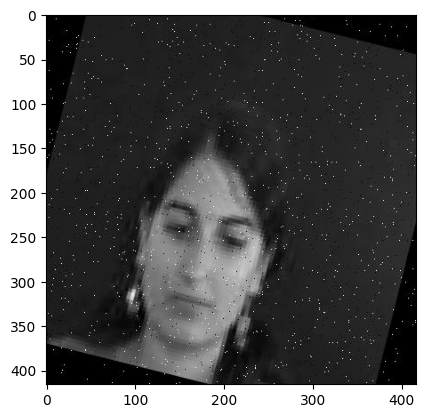

In [4]:
plt.imshow(img)

In [3]:
test_path=".\\Brain_tumor\\Testing"
train_path=".\\Brain_tumor\\Training"

In [4]:
classes=['Glioma','Meningioma','notumor','pituitary']

In [22]:
train = ImageDataGenerator(rescale = 1/255)
test= ImageDataGenerator(rescale=1/255)

In [39]:
train_set= train.flow_from_directory(train_path,color_mode="grayscale",batch_size=100,target_size=(200,200))

Found 5712 images belonging to 4 classes.


In [40]:
test_set= test.flow_from_directory(test_path,color_mode="grayscale",batch_size=100,target_size=(200,200))

Found 1311 images belonging to 4 classes.


In [46]:
model = keras.Sequential(
[
    layers.Conv2D(16,(3,3), input_shape=(200,200,1), padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax')
]
)
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 100, 100, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 98, 98, 32)        4640      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 23, 23, 64)      

In [48]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [43]:
model.fit(
    train_set,epochs=10,validation_data=test_set,verbose=2
)

Epoch 1/10
58/58 - 216s - loss: 1.2763 - accuracy: 0.3339 - val_loss: 1.2266 - val_accuracy: 0.4615 - 216s/epoch - 4s/step
Epoch 2/10
58/58 - 204s - loss: 1.0498 - accuracy: 0.5425 - val_loss: 1.0089 - val_accuracy: 0.6339 - 204s/epoch - 4s/step
Epoch 3/10
58/58 - 209s - loss: 0.9048 - accuracy: 0.6334 - val_loss: 0.9243 - val_accuracy: 0.6224 - 209s/epoch - 4s/step
Epoch 4/10
58/58 - 200s - loss: 0.7552 - accuracy: 0.7050 - val_loss: 0.7795 - val_accuracy: 0.6865 - 200s/epoch - 3s/step
Epoch 5/10
58/58 - 201s - loss: 0.6728 - accuracy: 0.7472 - val_loss: 0.7805 - val_accuracy: 0.6934 - 201s/epoch - 3s/step
Epoch 6/10
58/58 - 202s - loss: 0.6258 - accuracy: 0.7610 - val_loss: 0.9876 - val_accuracy: 0.6606 - 202s/epoch - 3s/step
Epoch 7/10
58/58 - 201s - loss: 0.5791 - accuracy: 0.7763 - val_loss: 0.6284 - val_accuracy: 0.7529 - 201s/epoch - 3s/step
Epoch 8/10
58/58 - 202s - loss: 0.5483 - accuracy: 0.7922 - val_loss: 0.6114 - val_accuracy: 0.7658 - 202s/epoch - 3s/step
Epoch 9/10
58/58

In [49]:
model.evaluate(test_set)

12/14 [========================>.....] - ETA: 2s - loss: 1.3856 - accuracy: 0.2275

In [28]:
from PIL import Image

In [68]:
image_path_1='.\\emotions\\test\\Happiness\\myvideo_frames10_jpg.rf.9a813cdfc133d2d48a0e6589a64fc2f7.jpg'
image_path_2='.\\emotions\\test\\Anger\\myvideo_frames60_jpg.rf.234b9213d7c96c4711e2a5c6b3095452.jpg'
image_path_3='.\\emotions\\test\\Sadness\\myvideo_frames0_jpg.rf.3a031dde7838bab327eb5fd9d16abffa.jpg'
image_path_4='.\\emotions\\test\\Surprise\\myvideo_frames435_jpg.rf.6f5577ccec69e23832b193d9e85e484b.jpg'
image_path_5='.\\emotions\\test\\Fear\\myvideo_frames260_jpg.rf.3ccec9aec9b0e50f66c978e1a8a9f70a.jpg'

In [84]:
read_img = cv2.imread(image_path_1)

In [85]:
img_array = Image.fromarray(read_img)
img_resize = img_array.resize((128,128))
print(read_img.size)
print(img_array)
print(img_resize.size)

519168
<PIL.Image.Image image mode=RGB size=416x416 at 0x20F0E553790>
(128, 128)


1/1 [==============================] - 0s 38ms/step
The below picture is showing the emotions of 'HAPPINESS'


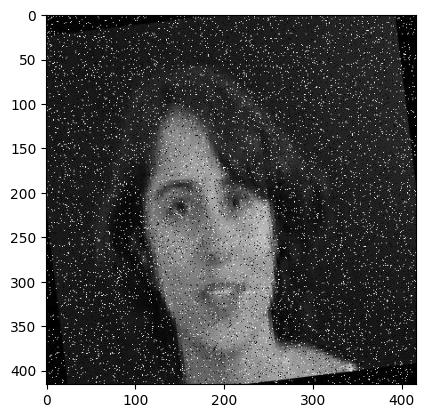

In [86]:
img= np.expand_dims(img_resize,axis=0)
image = np.array(img)
image=image/255
pred= model.predict(image)
res=pred.argmax()
plt.imshow(read_img)
print("The below picture is showing the emotions of '"+classes[res]+"'")

EMOTIONS DATASET 2